In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [8]:
df = pd.read_parquet("parsed_showdown_replays.parquet")

X = df.drop(['game_id', 'p1_revealed_pokemon', 'p2_revealed_pokemon'], axis=1)
y = df.p1_revealed_pokemon

In [10]:
X_n = X.select_dtypes(include='number')
X_c = X.select_dtypes(exclude='number')
imputer = SimpleImputer(strategy='mean')
X_processed_imputed = pd.DataFrame(imputer.fit_transform(X_n), columns=X_n.columns)
X_n = StandardScaler().set_output(transform='pandas').fit_transform(X_processed_imputed)
X_c = pd.get_dummies(X_c)
X = pd.concat([X_n,X_c],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
grid = {'n_neighbors': list(range(1,101))}

In [28]:
knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn, grid, cv=5)
knnCV.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [32]:
print("Best n_neighbors:", knnCV.best_params_['n_neighbors'])
print("Best Training Score Accuracy:", knnCV.best_score_)

Best n_neighbors: 1
Best Training Score Accuracy: 0.35589355562000013


In [34]:
best_knn = knnCV.best_estimator_
y_pred = best_knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.37142857142857144


In [52]:
K = []
train_accuracy = []
test_accuracy = []
for k in np.arange(100)+1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    K.append(k)
    train_acc = knn.score(X_train, y_train)
    train_accuracy.append(train_acc)
    
    test_acc = knn.score(X_test, y_test)
    test_accuracy.append(test_acc)

In [53]:
results = pd.DataFrame()
results['K'] = K
results['train accuracy'] = train_accuracy
results['test accuracy'] = test_accuracy

In [54]:
results

,K,train accuracy,test accuracy
0,1,1.000000,0.371429
1,2,0.682459,0.315038
2,3,0.628314,0.306767
3,4,0.606317,0.332331
4,5,0.588832,0.345865
...,...,...,...
95,96,0.305509,0.273684
96,97,0.304005,0.275940
97,98,0.304193,0.276692
98,99,0.303064,0.276692


Text(0, 0.5, 'Accuracy')

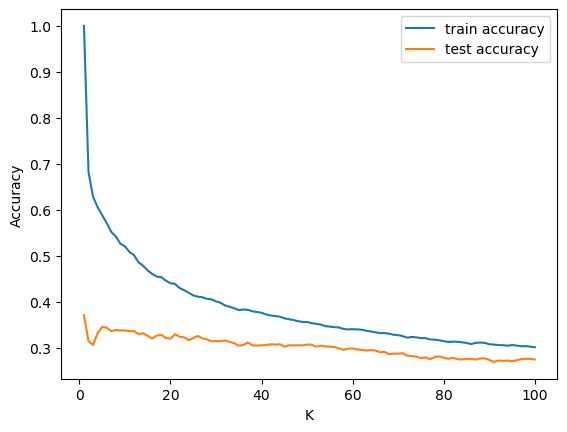

In [55]:
ax1=results.plot.line(x='K', y='train accuracy')
results.plot.line(x='K',y='test accuracy', ax=ax1)
plt.ylabel('Accuracy')

In [64]:
ix = results['test accuracy'].idxmax()
results.iloc[ix]

K                 1.000000
train accuracy    1.000000
test accuracy     0.371429
Name: 0, dtype: float64